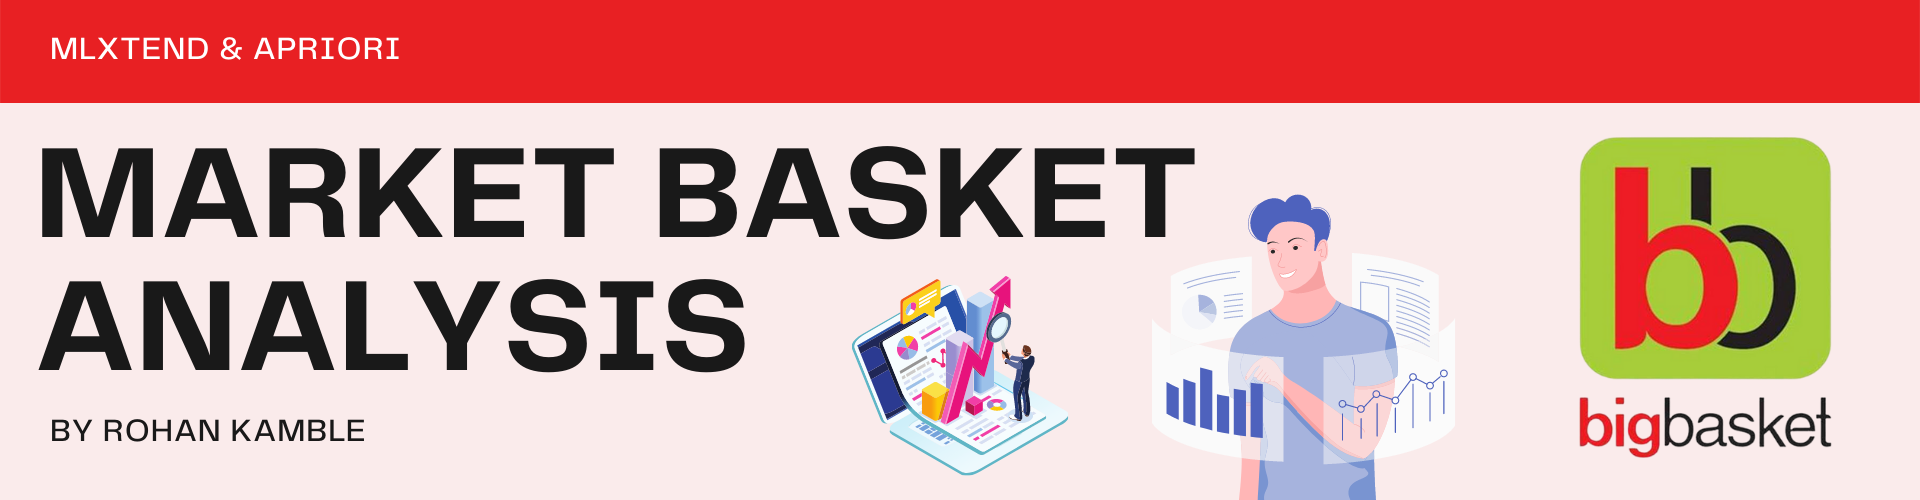

In [1]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#Reading Data
df = pd.read_excel('bigBasket.xlsx')
df.head(10)

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,2014-09-22 22:45:00.288,Other Sauces
1,M09736,6468572,15669800,2014-09-22 22:45:00.288,Cashews
2,M09736,6468572,34989501,2014-09-22 22:45:00.288,Other Dals
3,M09736,6468572,7572303,2014-09-22 22:45:00.288,Namkeen
4,M09736,6468572,15669856,2014-09-22 22:45:00.288,Sugar
5,M09736,6468572,15668478,2014-09-22 22:45:00.288,Banana
6,M09736,6468572,21409124,2014-09-22 22:45:00.288,Sugar Cubes
7,M09736,6468572,34938526,2014-09-22 22:45:00.288,Other Sweets
8,M09736,6468572,15669778,2014-09-22 22:45:00.288,Other Dals
9,M09736,6468572,34989440,2014-09-22 22:45:00.288,Other Rice Products


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Member       62141 non-null  object        
 1   Order        62141 non-null  int64         
 2   SKU          62141 non-null  int64         
 3   Created On   62141 non-null  datetime64[ns]
 4   Description  62141 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.4+ MB


In [3]:
df.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

# Step 1: Data Preparation

In [5]:
#Data Cleaning
df.dropna(axis=0,subset=['Order'],inplace=True) #Removing Null Values from the Order Column

In [6]:
df.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,2014-09-22 22:45:00.288,Other Sauces
1,M09736,6468572,15669800,2014-09-22 22:45:00.288,Cashews
2,M09736,6468572,34989501,2014-09-22 22:45:00.288,Other Dals
3,M09736,6468572,7572303,2014-09-22 22:45:00.288,Namkeen
4,M09736,6468572,15669856,2014-09-22 22:45:00.288,Sugar


In [7]:
df.shape

(62141, 5)

There are NO Null Values in Order Column.

In [8]:
#Removing Extra Spaces from Description
df['Description'] = df['Description'].str.strip()

There are NO Blank Spaces in Order Column.

In [9]:
#Converting all Columns to String except Date

df['Member'] = df['Member'].astype('str')
df['Order'] = df['Order'].astype('str')
df['SKU'] = df['SKU'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Member       62141 non-null  object        
 1   Order        62141 non-null  object        
 2   SKU          62141 non-null  object        
 3   Created On   62141 non-null  datetime64[ns]
 4   Description  62141 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.8+ MB


In [10]:
#Creating A Transaction Basket by Unstacking the Rows (UnPivot)

mybasket = df.groupby(['Order', 'Description'])['Order'].nunique().unstack().reset_index().fillna(0).set_index('Order')
mybasket.tail()

Description,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,...,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
8387964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8387967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8388196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8388442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8388492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Defining a Function to converting all positive vaues to 1 and everything else to 0

def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(encode)

In [17]:
my_basket_sets.head()

Description,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,...,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6422636,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6423338,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6423534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6423959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 2: Training The Model

In [18]:
#Generatig frequent itemsets - Min Support is based on Business Case. '0.07' in this case.

my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

In [20]:
my_frequent_itemsets['length'] = my_frequent_itemsets['itemsets'].apply(lambda x: len(x))

my_frequent_itemsets

,support,itemsets,length
0,0.077024,(Avalakki / Poha),1
1,0.260284,(Banana),1
2,0.399070,(Beans),1
3,0.120067,(Bread),1
4,0.272445,(Brinjals),1
...,...,...,...
61,0.109336,"(Brinjals, Other Vegetables, Root Vegetables)",3
62,0.120186,"(Gourd & Cucumber, Other Vegetables, Root Vege...",3
63,0.070824,"(Beans, Brinjals, Gourd & Cucumber, Other Vege...",4
64,0.075355,"(Beans, Brinjals, Other Vegetables, Root Veget...",4


In [24]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1.5)

In [26]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Beans),(Gourd & Cucumber),0.399070,0.300346,0.183975,0.461010,1.534930,0.064116,1.298084
1,(Gourd & Cucumber),(Beans),0.300346,0.399070,0.183975,0.612545,1.534930,0.064116,1.550966
2,(Brinjals),(Gourd & Cucumber),0.272445,0.300346,0.141409,0.519037,1.728132,0.059581,1.454695
3,(Gourd & Cucumber),(Brinjals),0.300346,0.272445,0.141409,0.470822,1.728132,0.059581,1.374876
4,(Gourd & Cucumber),(Other Vegetables),0.300346,0.427805,0.195183,0.649861,1.519059,0.066694,1.634194
...,...,...,...,...,...,...,...,...,...
95,(Root Vegetables),"(Beans, Brinjals, Other Vegetables)",0.414093,0.111601,0.075355,0.181975,1.630584,0.029141,1.086029
96,"(Beans, Gourd & Cucumber, Other Vegetables)",(Root Vegetables),0.131632,0.414093,0.086086,0.653986,1.579319,0.031578,1.693301
97,"(Beans, Gourd & Cucumber, Root Vegetables)",(Other Vegetables),0.113032,0.427805,0.086086,0.761603,1.780259,0.037730,2.400181
98,"(Beans, Other Vegetables, Root Vegetables)",(Gourd & Cucumber),0.153571,0.300346,0.086086,0.560559,1.866379,0.039961,1.592146


# Step 3: Making Recommendations

In [39]:
#Filtering rules based on condition
recommendations = my_rules[ (my_rules['lift'] >= 1.5) & (my_rules['confidence'] >= 0.5) ]
recommendations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Gourd & Cucumber),(Beans),0.300346,0.399070,0.183975,0.612545,1.534930,0.064116,1.550966
2,(Brinjals),(Gourd & Cucumber),0.272445,0.300346,0.141409,0.519037,1.728132,0.059581,1.454695
4,(Gourd & Cucumber),(Other Vegetables),0.300346,0.427805,0.195183,0.649861,1.519059,0.066694,1.634194
7,(Moong Dal),(Other Dals),0.134852,0.232741,0.077262,0.572944,2.461723,0.045877,1.796625
12,"(Beans, Banana)",(Root Vegetables),0.122094,0.414093,0.079409,0.650391,1.570638,0.028850,1.675890
14,"(Beans, Brinjals)",(Gourd & Cucumber),0.162394,0.300346,0.094074,0.579295,1.928761,0.045300,1.663052
15,"(Beans, Gourd & Cucumber)",(Brinjals),0.183975,0.272445,0.094074,0.511342,1.876858,0.043951,1.488882
16,"(Brinjals, Gourd & Cucumber)",(Beans),0.141409,0.399070,0.094074,0.665261,1.667029,0.037642,1.795222
20,"(Beans, Brinjals)",(Other Vegetables),0.162394,0.427805,0.111601,0.687225,1.606397,0.042128,1.829412
22,"(Brinjals, Other Vegetables)",(Beans),0.172529,0.399070,0.111601,0.646856,1.620908,0.042750,1.701655


Based on the Above Result we can see the Items which are frequently Bought together. 
Accordingly, we can make the Recommendations to the Customers.

In [45]:
#Export the Data to csv for Visualization

my_rules.to_csv('MBA.csv', index=False )